In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import PIL.Image as img

In [ ]:
# Uploading dataset
def img_array(path):
    image = img.open(path)
    tmp = np.array(image)
    image.close()
    return tmp

globs = glob.glob('/content/drive/MyDrive/dataset/roman/dataset/1/*.png')
dataset = np.array(list(map(img_array, globs)))
labels = np.ones(len(dataset))-1

for i in range(2,9):
    globs = glob.glob('/content/drive/MyDrive/dataset/roman/dataset/'+str(i)+'/*.png')
    dataset = np.concatenate([dataset,np.array(list(map(img_array, globs)))])
    labels = np.concatenate([labels, np.ones(len(np.array(list(map(img_array, globs)))))*(i-1)])

In [ ]:
dataset = np.mean(dataset, axis=3)

In [ ]:
# Checking shapes
print(dataset.shape)
print(labels.shape)

(240, 28, 28)
(240,)


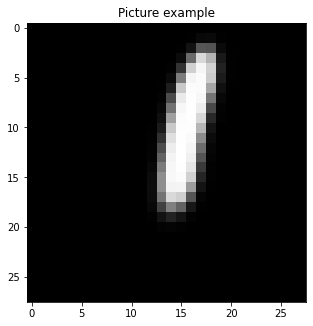

In [ ]:
rcParams['figure.figsize'] = 5, 10
plt.title('Picture example')
plt.imshow(dataset[1], cmap='Greys')
plt.show()

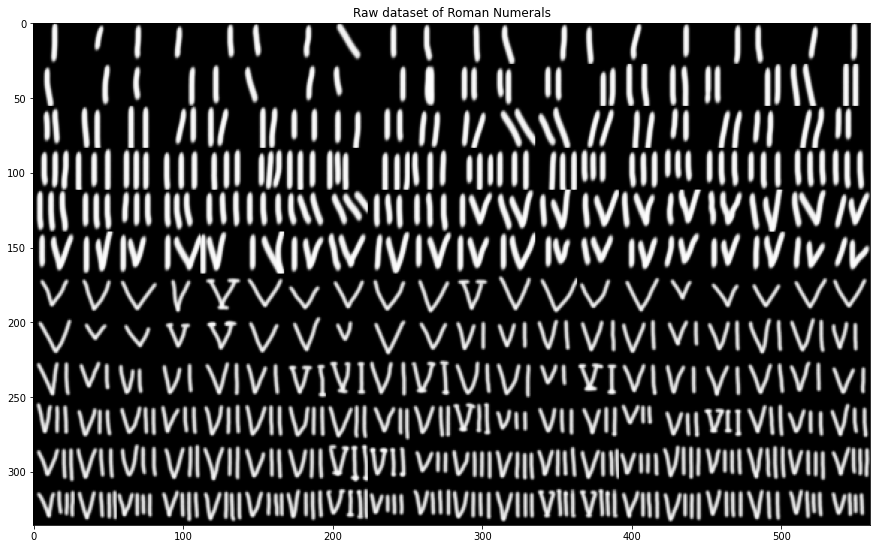

In [ ]:
def gallery(array, ncols=20):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols))
    return result

rcParams['figure.figsize'] = 15, 30
result = gallery(dataset)
plt.title('Raw dataset of Roman Numerals')
plt.imshow(result, cmap='Greys')
plt.show()

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor
from Augmentor import Pipeline

def augmentation(path):
    p = Augmentor.Pipeline(path) # ensure you press enter after this, don't just c&p this code.
    Pipeline.set_seed(100)
    p.rotate(probability=0.3, max_left_rotation=3, max_right_rotation=3)
    p.random_distortion(probability=0.7, grid_width=4, grid_height=4, magnitude=2)
    p.random_erasing(probability=0.2, rectangle_area=0.2)
    p.sample(200)

path = '/content/drive/MyDrive/dataset/roman/dataset/'
for i in range(1,9):
    augmentation(path+str(i)+'/')

Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/1/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E223110>: 100%|██████████| 200/200 [00:02<00:00, 87.73 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/2/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E1B0890>: 100%|██████████| 200/200 [00:02<00:00, 92.30 Samples/s] 


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/3/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E20E1D0>: 100%|██████████| 200/200 [00:02<00:00, 81.53 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/4/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E1C2BD0>: 100%|██████████| 200/200 [00:02<00:00, 88.85 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/5/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E1EEB50>: 100%|██████████| 200/200 [00:02<00:00, 86.44 Samples/s] 


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/6/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E1D6D50>: 100%|██████████| 200/200 [00:02<00:00, 81.53 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/7/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E223290>: 100%|██████████| 200/200 [00:02<00:00, 85.11 Samples/s]


Initialised with 30 image(s) found.
Output directory set to /content/drive/MyDrive/dataset/roman/dataset/8/output.

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FF23E1C5490>: 100%|██████████| 200/200 [00:02<00:00, 85.36 Samples/s]


In [ ]:
globs = glob.glob('/content/drive/MyDrive/dataset/roman/dataset/1/output/*.png')
aug_dataset = np.array(list(map(img_array, globs)))
aug_labels = np.ones(len(aug_dataset))-1

for i in range(2,9):
    globs = glob.glob('/content/drive/MyDrive/dataset/roman/dataset/'+str(i)+'/output/*.png')
    aug_dataset = np.concatenate([aug_dataset,np.array(list(map(img_array, globs)))])
    aug_labels = np.concatenate([aug_labels, np.ones(len(np.array(list(map(img_array, globs)))))*(i-1)])
    
# Making them all in one chanel
aug_dataset = np.mean(aug_dataset, axis=3)

In [ ]:
result = gallery(aug_dataset, 32)
plt.title('Augmented part of dataset of Roman Numerals')
plt.imshow(result, cmap='Greys')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors

X = np.concatenate([dataset, aug_dataset])
# X = dataset
# y = labels
X = X/255.
X = X.reshape((len(X), 28*28))
y = np.concatenate([labels, aug_labels])
# X,y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_test = X_test.shape[0]
N_test

688

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(np.mean(y_test != y_test_pred))

0.9927325581395349
0.007267441860465116


In [ ]:
metrics.confusion_matrix(y_test, y_test_pred)

array([[101,   0,   0,   0,   0,   0,   0,   0],
       [  0,  89,   0,   0,   0,   0,   0,   0],
       [  0,   0,  81,   0,   0,   0,   0,   0],
       [  0,   0,   0,  93,   0,   0,   0,   0],
       [  0,   0,   0,   0,  74,   0,   0,   0],
       [  0,   0,   0,   0,   1,  86,   0,   1],
       [  0,   0,   0,   0,   0,   2,  88,   0],
       [  0,   0,   0,   0,   0,   0,   1,  71]])

In [ ]:
M = metrics.confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [ ]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

In [ ]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)

In [ ]:
print(min(err_test))
print(kk[err_test.index(min(err_test))])

0.0014534883720930232
9


In [ ]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 1)
plt.xlim([30, 0])

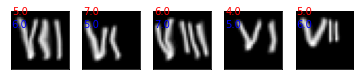

In [ ]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
i=1
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
yi_test_pred =model.predict(X_test)
for i in range(N_test):
    if yi_test_pred[i]!= y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(np.reshape(X_test[i, :], [28, 28]), cmap='gray')
        plt.imshow(np.reshape(X_test[i, :], (28, 28)), cmap = plt.cm.binary)
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred[i]), color = 'r')